In [1]:
# change makefile to have GPU and OPENCV enabled
%cd ~/dataset/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/home/gckim/dataset/darknet


In [2]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [3]:
# define helper functions
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    print(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

# use this to upload files
def upload():
    from google.colab import files
    uploaded = files.upload() 
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
            print ('saved file', name)

# use this to download a file  
def download(path):
    from google.colab import files
    files.download(path)

In [ ]:
# single class
# 원래 label 형태
# Vehicle registration plate 195.999744 411.75818200000003 318.39948799999996 512.4991299999999
# Vehicle registration plate 849.5994880000001 212.67556199999999 868.7994880000001 235.86151600000002
# yolo label 형태
# 0 0.25097631249999997 0.6770647829912024 0.11953099999999997 0.14771399999999985
# 0 0.8384760625000001 0.3279700322580645 0.018750000000000044 0.033997000000000055

# copy dataset from google drive
train, validation dataset 복사

# Download pre-trained weights for the convolutional layers

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# Train custom object detector

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj_crosswalk.data cfg/yolov4-obj-explanation.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [ ]:
# 오류가 나서 갑자기 종료 되었을 때
# kick off training from where it last saved
# !./darknet detector train data/obj_crosswalk.data cfg/yolov4-obj-explanation.cfg ../backup_crosswalk/yolov4-obj_last.weights -dont_show

In [ ]:
# imShow('chart.png')

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj_palmtree.data cfg/yolov4-obj-explanation.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj_car.data cfg/yolov4-obj-explanation.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

# Checking the Mean Average Precision (mAP) of Your Model

In [5]:
!./darknet detector map data/obj_crosswalk.data cfg/yolov4-obj-explanation.cfg ../backup_crosswalk/yolov4-obj-explanation_best.weights

 CUDA-version: 10020 (11000), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: GeForce RTX 2070 SUPER 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 

 106 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 107 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 108 max                5x 5/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.001 BF
 109 route  107 		                           ->   10 x  10 x 512 
 110 max                9x 9/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.004 BF
 111 route  107 		                           ->   10 x  10 x 512 
 112 max               13x13/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.009 BF
 113 route  112 110 108 107 	                   ->   10 x  10 x2048 
 114 conv    512       1 x 1/ 1     10 x  10 x2048 ->   10 x  10 x 512 0.210 BF
 115 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 116 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 117 conv    256       1 x 1/ 1     10 x  10 x 512 ->   10 x  10 x 256 0.026 BF
 118 upsample                 2x    10 x  10 x 256 ->   20 x  20 x 256
 119 rou

In [6]:
!./darknet detector map data/obj_palmtree.data cfg/yolov4-obj-explanation.cfg ../backup_palmtree/yolov4-obj-explanation_best.weights

 CUDA-version: 10020 (11000), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: GeForce RTX 2070 SUPER 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 

 102 conv    512       1 x 1/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.052 BF
 103 route  102 87 	                           ->   10 x  10 x1024 
 104 conv   1024       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x1024 0.210 BF
 105 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 106 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 107 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 108 max                5x 5/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.001 BF
 109 route  107 		                           ->   10 x  10 x 512 
 110 max                9x 9/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.004 BF
 111 route  107 		                           ->   10 x  10 x 512 
 112 max               13x13/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.009 BF
 113 route  112 110 108 107 	                   ->   10 x  10 x2048 
 114 conv    512       1 x 1/ 1     10 x  10 x2048 ->   10 x  10 x 512 0.210 BF
 115 conv  

In [7]:
!./darknet detector map data/obj_car.data cfg/yolov4-obj-explanation.cfg ../backup_car/yolov4-obj-explanation_best.weights

 CUDA-version: 10020 (11000), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: GeForce RTX 2070 SUPER 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 

 104 conv   1024       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x1024 0.210 BF
 105 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 106 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 107 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 108 max                5x 5/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.001 BF
 109 route  107 		                           ->   10 x  10 x 512 
 110 max                9x 9/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.004 BF
 111 route  107 		                           ->   10 x  10 x 512 
 112 max               13x13/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.009 BF
 113 route  112 110 108 107 	                   ->   10 x  10 x2048 
 114 conv    512       1 x 1/ 1     10 x  10 x2048 ->   10 x  10 x 512 0.210 BF
 115 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 116 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF

# Run Your Custom Object Detector
prediction할 이미지 predictions.jpg로 저장

In [ ]:
# need to set our custom cfg to test mode 
# %cd cfg
# !sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
# !sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
# %cd ..

 CUDA-version: 10020 (11000), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: GeForce RTX 2070 SUPER 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 

 106 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 107 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 108 max                5x 5/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.001 BF
 109 route  107 		                           ->   10 x  10 x 512 
 110 max                9x 9/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.004 BF
 111 route  107 		                           ->   10 x  10 x 512 
 112 max               13x13/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.009 BF
 113 route  112 110 108 107 	                   ->   10 x  10 x2048 
 114 conv    512       1 x 1/ 1     10 x  10 x2048 ->   10 x  10 x 512 0.210 BF
 115 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 116 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 117 conv    256       1 x 1/ 1     10 x  10 x 512 ->   10 x  10 x 256 0.026 BF
 118 upsample                 2x    10 x  10 x 256 ->   20 x  20 x 256
 119 rou

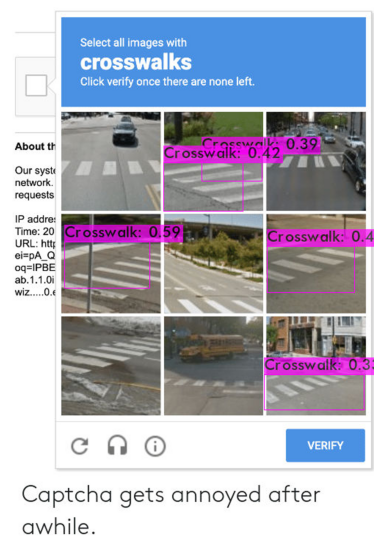

In [4]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj_crosswalk.data cfg/yolov4-obj-explanation.cfg ../backup_crosswalk/yolov4-obj-explanation_best.weights ./crosswalk2.png -thresh 0.3
imShow('predictions.jpg')

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj_palmtree.data cfg/yolov4-obj-explanation-test.cfg ../backup_palmtree/yolov4-obj-explanation_best.weights ./palmtree2.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10020 (11000), cuDNN: 8.0.4, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: GeForce RTX 2070 SUPER 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x

 105 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 106 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 107 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 108 max                5x 5/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.001 BF
 109 route  107 		                           ->   10 x  10 x 512 
 110 max                9x 9/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.004 BF
 111 route  107 		                           ->   10 x  10 x 512 
 112 max               13x13/ 1     10 x  10 x 512 ->   10 x  10 x 512 0.009 BF
 113 route  112 110 108 107 	                   ->   10 x  10 x2048 
 114 conv    512       1 x 1/ 1     10 x  10 x2048 ->   10 x  10 x 512 0.210 BF
 115 conv   1024       3 x 3/ 1     10 x  10 x 512 ->   10 x  10 x1024 0.944 BF
 116 conv    512       1 x 1/ 1     10 x  10 x1024 ->   10 x  10 x 512 0.105 BF
 117 conv    256       1 x 1/ 1     10 x  10 x 512 ->   10 x  10 x 256 0.026 BF

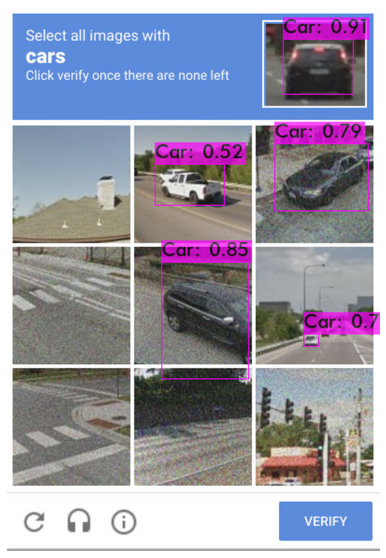

In [9]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj_car.data cfg/yolov4-obj-explanation-test.cfg ../backup_car/yolov4-obj-explanation_best.weights ./car2.png -thresh 0.3
imShow('predictions.jpg')